In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageOps
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import v2

(1536, 2048)


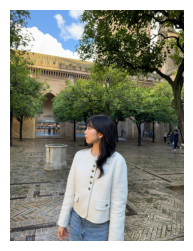

In [3]:
def visualize(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')
    plt.xlabel('ungsung')
    plt.show()

image_path = './ungsung_dataset/ungsung/ungsung1.jpeg'

sample = Image.open(image_path)
sample = ImageOps.exif_transpose(sample) 
t = v2.Resize(size=(2048, 1536))
sample = t(sample)
print(sample.size)
visualize(sample)

In [17]:
class UNGSUNGDataset(Dataset):
    def __init__(self, inputs, labels):
        super().__init__()
        self.inputs = inputs
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, index):
        input = torch.tensor(self.inputs[index])
        label = torch.tensor(self.labels[index])
        return input, label

class UNGSUNG(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, 1, 1)
        self.conv2 = nn.Conv2d(8, 4, 5, 1, 2)
        self.maxpool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.linear0 = nn.Linear(786432, 64)
        self.linear1 = nn.Linear(64, 1)
    def forward(self, inputs):
        x = F.relu(self.conv1(inputs))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = self.flatten(x)
        x = F.relu(self.linear0(x))
        outputs = F.sigmoid(self.linear1(x))
        return outputs

model = UNGSUNG()

In [4]:
transformer_origin = v2.Compose(
    [
        v2.CenterCrop(size=(2048, 1536)),
        v2.ToImage(),
        v2.ToDtype(dtype=torch.float32, scale=True),
    ]
)
transformer_origin_colored = v2.Compose(
    [
        v2.CenterCrop(size=(2048, 1536)),
        v2.ColorJitter(
            brightness=0.5,
            contrast = 0.5,
            saturation = 0.5,
            hue=0.25,
        ),
        v2.ToImage(),
        v2.ToDtype(dtype=torch.float32, scale=True),
    ]
)
transformer_horizontal = v2.Compose(
    [
        v2.CenterCrop(size=(2048, 1536)),
        v2.RandomHorizontalFlip(1),
        v2.ToImage(),
        v2.ToDtype(dtype=torch.float32, scale=True),
    ]
)
transformer_horizontal_colored = v2.Compose(
    [
        v2.CenterCrop(size=(2048, 1536)),
        v2.RandomHorizontalFlip(1),
        v2.ColorJitter(
            brightness=0.5,
            contrast = 0.5,
            saturation = 0.5,
            hue=0.25,
        ),
        v2.ToImage(),
        v2.ToDtype(dtype=torch.float32, scale=True),
    ]
)

In [5]:
inputs = []
labels = []

import os 

ungsung_path = os.listdir('./ungsung_dataset/ungsung')
for path in ungsung_path:
    extact_path = f"./ungsung_dataset/ungsung/{path}"
    image = Image.open(extact_path)
    image = ImageOps.exif_transpose(image) 
    inputs.append(transformer_origin(image))
    labels.append(torch.tensor(1, dtype=torch.float32))
    inputs.append(transformer_horizontal(image))
    labels.append(torch.tensor(1, dtype=torch.float32))
    inputs.append(transformer_origin_colored(image))
    labels.append(torch.tensor(1, dtype=torch.float32))
    inputs.append(transformer_horizontal_colored(image))
    labels.append(torch.tensor(1, dtype=torch.float32))

not_ungsung_path = os.listdir('./ungsung_dataset/not')
for path in not_ungsung_path:
    extact_path = f"./ungsung_dataset/not/{path}"
    image = Image.open(extact_path)
    image = ImageOps.exif_transpose(image) 
    inputs.append(transformer_origin(image))
    labels.append(torch.tensor(0, dtype=torch.float32))

UnidentifiedImageError: cannot identify image file './ungsung_dataset/not/.DS_Store'

In [8]:
not_ungsung_path = os.listdir('./ungsung_dataset/not')
for path in not_ungsung_path:
    print(path)
    extact_path = f"./ungsung_dataset/not/{path}"
    image = Image.open(extact_path)
    image = ImageOps.exif_transpose(image) 
    inputs.append(transformer_origin(image))
    labels.append(torch.tensor(0, dtype=torch.float32))

not776.jpeg
not326.jpeg
not633.jpeg
not799.jpeg
not263.jpeg
not3.jpeg
not371.jpeg
not721.jpeg
not234.jpeg
not664.jpeg
not408.jpeg
not737.jpeg
not367.jpeg
not388.jpeg
not672.jpeg
not222.jpeg
not808.jpeg
not330.jpeg
not760.jpeg
not275.jpeg
not625.jpeg
not449.jpeg
not76.jpeg
not432.jpeg
not598.jpeg
not577.jpeg
not127.jpeg
not824.jpeg
not99.jpeg
not609.jpeg
not259.jpeg
not465.jpeg
not21.jpeg
not170.jpeg
not520.jpeg
not37.jpeg
not189.jpeg
not473.jpeg
not536.jpeg
not166.jpeg
not648.jpeg
not218.jpeg
not424.jpeg
not60.jpeg
not832.jpeg
not131.jpeg
not561.jpeg
not516.jpeg
not146.jpeg
not17.jpeg
not453.jpeg
not280.jpeg
not795.jpeg
not812.jpeg
not111.jpeg
not541.jpeg
not404.jpeg
not40.jpeg
not687.jpeg
not392.jpeg
not668.jpeg
not238.jpeg
not557.jpeg
not107.jpeg
not804.jpeg
not56.jpeg
not412.jpeg
not691.jpeg
not384.jpeg
not150.jpeg
not500.jpeg
not445.jpeg
not296.jpeg
not629.jpeg
not783.jpeg
not279.jpeg
not594.jpeg
not95.jpeg
not828.jpeg
not652.jpeg
not202.jpeg
not717.jpeg
not347.jpeg
not193.jpeg
not

: 

In [ ]:
len(inputs), len(labels)

In [ ]:
train_size = int(len(inputs) * 0.85)
val_size = int(len(inputs) * 0.1)

train_inputs = inputs[:train_size]
train_labels = labels[:train_size]
val_inputs = inputs[train_size:train_size+val_size]
val_labels = labels[train_size:train_size+val_size]
test_inputs = inputs[train_size+val_size:]
test_labels = labels[train_size+val_size:]

train_dataset = UNGSUNGDataset(train_inputs, train_labels)
val_dataset = UNGSUNGDataset(val_inputs, val_labels)
test_dataset = UNGSUNGDataset(test_inputs, test_labels)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, drop_last=False)
val_dataloader = DataLoader(val_dataset, batch_size=16)
test_dataloader = DataLoader(test_dataset, batch_size=16)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters())
epochs = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
def evaluate_batch(dataloader, model, loss_fn):
    model.eval()
    losses = []
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs = batch[0].to(device)
            labels = batch[1].to(device)
            preds = model(inputs)
            loss = loss_fn(preds, labels)
            losses.append(loss)
            preds_label = (preds > 0.5)
            correct += (preds_label == labels).sum().item()
            total += len(labels)
    val_loss_avg = sum(losses) / len(losses)
    acc = correct / total 
    return val_loss_avg, acc

In [ ]:
cnt = 0
for epoch in range(epochs):
    model.train()
    for train_batch in train_dataloader:
        print(cnt)
        inputs = train_batch[0].to(device)
        labels = train_batch[1].to(device)
        preds = model(inputs).squeeze()
        print(preds.size(), labels.size())
        loss = loss_fn(preds, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        cnt += 1
    loss_avg, acc = evaluate_batch(val_dataloader, model, loss_fn)
    print(f"loss / acc at epoch {epoch+1}/{epochs}: {loss_avg}/{acc}")

/var/folders/f4/dlc6vs952d9_s55nyfp4qb8r0000gn/T/ipykernel_47492/2686630864.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(self.inputs[index])
/var/folders/f4/dlc6vs952d9_s55nyfp4qb8r0000gn/T/ipykernel_47492/2686630864.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(self.labels[index])


0
torch.Size([16]) torch.Size([16])
1
torch.Size([16]) torch.Size([16])


KeyboardInterrupt: 